In [158]:
#!pip install rasterio

In [165]:
import numpy as np
import rasterio

# CSV 파일 읽어오기
data = np.loadtxt('map_humidity_1.csv', delimiter=',', skiprows=1, encoding='utf-8')

# 래스터 이미지 생성
with rasterio.open(
    'humidity.tif', 'w',
    driver='GTiff',
    height=data.shape[0],
    width=data.shape[1] - 1,  # 첫 번째 열을 제외한 폭(width)
    count=1,
    dtype='float64',
    crs='+proj=latlong',
    transform=rasterio.transform.from_bounds(0, 0, data.shape[1]-1, data.shape[0], data.shape[1]-1, data.shape[0])
) as dst:
    dst.write_band(1, data[:, 1:])  # 첫 번째 열을 제외한 데이터를 쓰기


In [166]:
with rasterio.open('humidity.tif') as src:
    # 속성 정보 출력
    print('Width:', src.width)
    print('Height:', src.height)
    print('Number of Bands:', src.count)
    print('CRS:', src.crs)
    print('Transform:', src.transform)
    
    # 래스터 데이터 읽기
    data = src.read()

Width: 249
Height: 174
Number of Bands: 1
CRS: EPSG:4326
Transform: | 1.00, 0.00, 0.00|
| 0.00,-1.00, 174.00|
| 0.00, 0.00, 1.00|


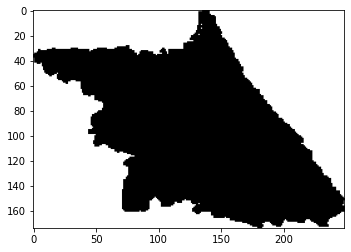

In [167]:
import rasterio
from matplotlib import pyplot as plt

# tif 파일 열기
with rasterio.open('humidity.tif') as src:
    # 래스터 데이터 읽기
    data = src.read(1)

# 이미지 시각화
plt.imshow(data, cmap='gray')
plt.show()


In [178]:
import matplotlib
print(matplotlib.rcsetup.all_backends)


['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [183]:
import matplotlib
matplotlib.use('Agg')

def show_map(input_raster='', colormap='', image_size=1.5, return_figure=False):
    with rasterio.open(input_raster) as image_data:
        my_matrix = image_data.read(1)
        my_matrix = np.ma.masked_where(my_matrix == 32767, my_matrix)
        fig, ax = plt.subplots()
        image_hidden = ax.imshow(my_matrix, cmap=colormap)
        plt.close()

        fig, ax = plt.subplots()
        fig.set_facecolor("w")
        width = fig.get_size_inches()[0] * image_size
        height = fig.get_size_inches()[1] * image_size
        fig.set_size_inches(w=width, h=height)
        image = ax.imshow(my_matrix, cmap=colormap, vmin=2, vmax=100) # 습도의 최댓값 100, 최솟값 2, 사이 간격은 256개
        # cbar = fig.colorbar(image_hidden, ax=ax, pad=0.01)
        plt.axis('off')
        if return_figure == False:
            plt.show()
            plt.savefig('test.png', bbox_inches='tight', transparent=True)
        else:
            return fig,ax


<ipython-input-183-af596149c5c2>:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


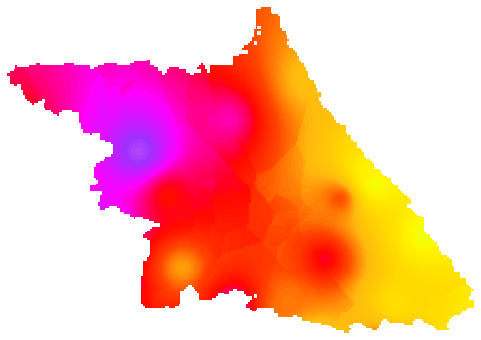

In [184]:
show_map(input_raster='humidity.tif', colormap='gist_ncar', image_size=1.5, return_figure=False)